In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score,precision_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Dữ liệu

In [3]:
df = pd.read_excel('Insurance.xlsx')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Age,Months Since Driving
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2019-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,41,236
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2019-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,39,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2019-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,54,23
3,WW63253,California,7645.861827,No,Basic,Bachelor,2019-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,23,12
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2019-03-02,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,70,643


## Tiền xử lý

### Chọn các cột đặc trưng

In [4]:
df_model=df[['Customer','Vehicle Class','Coverage','Marital Status','Location Code','Months Since Driving',
                 'Age','EmploymentStatus','Monthly Premium Auto','Months Since Last Claim','State']]
df_model

,Customer,Vehicle Class,Coverage,Marital Status,Location Code,Months Since Driving,Age,EmploymentStatus,Monthly Premium Auto,Months Since Last Claim,State
0,BU79786,Two-Door Car,Basic,Married,Suburban,236,41,Employed,69,32,Washington
1,QZ44356,Four-Door Car,Extended,Single,Suburban,5,39,Unemployed,94,13,Arizona
2,AI49188,Two-Door Car,Premium,Married,Suburban,23,54,Employed,108,18,Nevada
3,WW63253,SUV,Basic,Married,Suburban,12,23,Unemployed,106,18,California
4,HB64268,Four-Door Car,Basic,Single,Rural,643,70,Employed,73,12,Washington
...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,Four-Door Car,Basic,Married,Urban,263,57,Employed,73,18,California
9130,PK87824,Four-Door Car,Extended,Divorced,Suburban,262,49,Employed,79,14,California
9131,TD14365,Four-Door Car,Extended,Single,Suburban,162,46,Unemployed,85,9,California
9132,UP19263,Four-Door Car,Extended,Married,Suburban,253,65,Employed,96,34,California


### Kiểm tra giá trị null

In [5]:
df_model.isnull().sum()

Customer                   0
Vehicle Class              0
Coverage                   0
Marital Status             0
Location Code              0
Months Since Driving       0
Age                        0
EmploymentStatus           0
Monthly Premium Auto       0
Months Since Last Claim    0
State                      0
dtype: int64

### Kiểm tra giá trị trùng lặp

In [6]:
df_model.duplicated().sum()

0

### Kiểm tra giá trị ngoại lai

<Axes: >

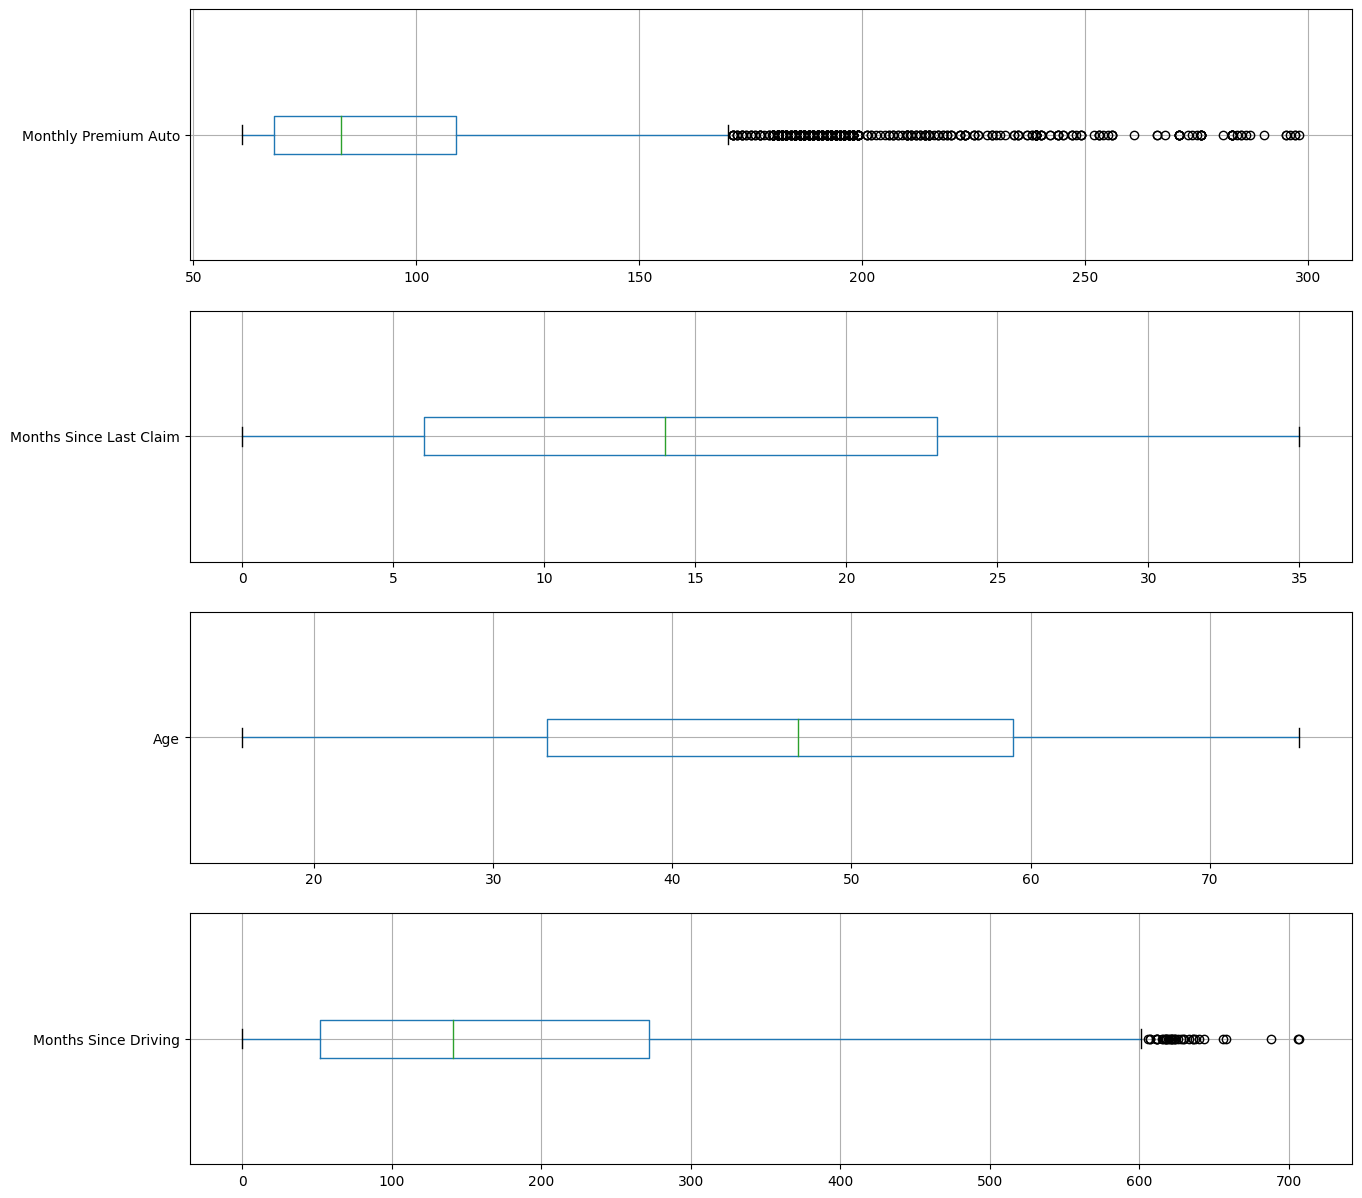

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))
df_model[["Monthly Premium Auto"]].boxplot(ax=axes[0], vert=False)
df_model[["Months Since Last Claim"]].boxplot(ax=axes[1], vert=False)
df_model[["Age"]].boxplot(ax=axes[2], vert=False)
df_model[["Months Since Driving"]].boxplot(ax=axes[3], vert=False)

In [8]:
export_csv = df_model.to_excel (r'Insurance_pricing.xlsx', index = None, header=True)

In [9]:
basic=df_model[df_model['Coverage']=='Basic']
extended=df_model[df_model['Coverage']=='Extended']
premium=df_model[df_model['Coverage']=='Premium']
df_model

,Customer,Vehicle Class,Coverage,Marital Status,Location Code,Months Since Driving,Age,EmploymentStatus,Monthly Premium Auto,Months Since Last Claim,State
0,BU79786,Two-Door Car,Basic,Married,Suburban,236,41,Employed,69,32,Washington
1,QZ44356,Four-Door Car,Extended,Single,Suburban,5,39,Unemployed,94,13,Arizona
2,AI49188,Two-Door Car,Premium,Married,Suburban,23,54,Employed,108,18,Nevada
3,WW63253,SUV,Basic,Married,Suburban,12,23,Unemployed,106,18,California
4,HB64268,Four-Door Car,Basic,Single,Rural,643,70,Employed,73,12,Washington
...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,Four-Door Car,Basic,Married,Urban,263,57,Employed,73,18,California
9130,PK87824,Four-Door Car,Extended,Divorced,Suburban,262,49,Employed,79,14,California
9131,TD14365,Four-Door Car,Extended,Single,Suburban,162,46,Unemployed,85,9,California
9132,UP19263,Four-Door Car,Extended,Married,Suburban,253,65,Employed,96,34,California


# Phân cụm

In [10]:
def cluster(df_model,n):
    do_dummy_cols = ['Vehicle Class', 'Marital Status','Location Code','EmploymentStatus','State']
    clus_model= pd.get_dummies(df_model, columns=do_dummy_cols)
    clus_model=clus_model.drop(columns=['Customer','Coverage'])
    clus_model = clus_model.dropna()
    scaled_df = StandardScaler().fit_transform(clus_model)
    kmeans = KMeans(init="random", n_clusters=n, n_init=10, random_state=1)
    kmeans.fit(scaled_df)
    df_model['Cluster']=kmeans.labels_
    return df_model

In [11]:
basic = cluster(basic,2)
B1=basic[basic['Cluster']==0]
B2=basic[basic['Cluster']==1]
extended = cluster(extended,2)
E1=extended[extended['Cluster']==0]
E2=extended[extended['Cluster']==1]
premium = cluster(premium,2)
P1=premium[premium['Cluster']==0]
P2=premium[premium['Cluster']==1]

C:\Users\ntthu\AppData\Local\Temp\ipykernel_5608\3734719162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Cluster']=kmeans.labels_
C:\Users\ntthu\AppData\Local\Temp\ipykernel_5608\3734719162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Cluster']=kmeans.labels_
C:\Users\ntthu\AppData\Local\Temp\ipykernel_5608\3734719162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [12]:
l=[]
c=[B1,B2,E1,E2,P1,P2]
for i in range(len(c)):
    d={}
    d['Cluster']=i
    d['Count']=len(c[i])
    d['State']=c[i]['State'].unique()
    d['Vehicle Class']=c[i]['Vehicle Class'].unique()
    d['Coverage']=c[i]['Coverage'].unique()
    d['Marital Status']=c[i]['Marital Status'].unique()
    d['Location Code']=c[i]['Location Code'].unique()
    d['EmploymentStatus']=c[i]['EmploymentStatus'].unique()
    d['Months Since Driving']=str(c[i].describe()['Months Since Driving'][3])+' - '+str(c[i].describe()['Months Since Driving'][-1])
    d['Age']=str(c[i].describe()['Age'][3])+' - '+str(c[i].describe()['Age'][-1])
    d['Months Since Last Claim']=str(c[i].describe()['Months Since Last Claim'][3])+' - '+str(c[i].describe()['Months Since Last Claim'][-1])
    d['Monthly Premium Auto']=str(c[i].describe()['Monthly Premium Auto'][3])+' - '+str(c[i].describe()['Monthly Premium Auto'][-1])
    # print(d)
    l.append(d)
# print(l)
clus=pd.DataFrame(l)
clus['Cluster'] = clus['Cluster'].replace([0,1,2,3,4,5],['B1','B2','E1','E2','P1','P2'])
clus

,Cluster,Count,State,Vehicle Class,Coverage,Marital Status,Location Code,EmploymentStatus,Months Since Driving,Age,Months Since Last Claim,Monthly Premium Auto
0,B1,1542,"[California, Arizona, Oregon, Washington, Nevada]","[SUV, Sports Car, Luxury Car, Luxury SUV]",[Basic],"[Married, Divorced, Single]","[Suburban, Rural, Urban]","[Unemployed, Employed, Medical Leave, Disabled...",0.0 - 225.0,16.0 - 73.0,0.0 - 35.0,100.0 - 199.0
1,B2,4026,"[Washington, Oregon, California, Nevada, Arizona]","[Two-Door Car, Four-Door Car, Sports Car, SUV]",[Basic],"[Married, Single, Divorced]","[Suburban, Rural, Urban]","[Employed, Medical Leave, Unemployed, Disabled...",0.0 - 706.0,36.0 - 75.0,0.0 - 35.0,61.0 - 119.0
2,E1,769,"[Washington, Nevada, Oregon, California, Arizona]","[SUV, Luxury SUV, Sports Car, Luxury Car]",[Extended],"[Married, Divorced, Single]","[Urban, Suburban, Rural]","[Disabled, Employed, Unemployed, Medical Leave...",0.0 - 215.0,16.0 - 66.0,0.0 - 35.0,121.0 - 249.0
3,E2,1973,"[Arizona, Oregon, Washington, California, Nevada]","[Four-Door Car, Two-Door Car, SUV, Sports Car]",[Extended],"[Single, Married, Divorced]","[Suburban, Urban, Rural]","[Unemployed, Employed, Disabled, Retired, Medi...",0.0 - 688.0,37.0 - 75.0,0.0 - 35.0,76.0 - 139.0
4,P1,579,"[Nevada, Arizona, California, Oregon, Washington]","[Two-Door Car, Four-Door Car]",[Premium],"[Married, Single, Divorced]","[Suburban, Urban, Rural]","[Employed, Unemployed, Disabled, Medical Leave...",0.0 - 707.0,30.0 - 75.0,0.0 - 35.0,101.0 - 119.0
5,P2,245,"[Oregon, Arizona, Washington, California, Nevada]","[SUV, Luxury SUV, Sports Car, Luxury Car]",[Premium],"[Married, Single, Divorced]","[Rural, Urban, Suburban]","[Disabled, Employed, Unemployed, Retired, Medi...",0.0 - 533.0,16.0 - 74.0,0.0 - 35.0,140.0 - 298.0


# Mô hình

### Dữ liệu vào

In [13]:
basic['Cluster']=basic['Cluster'].replace([0,1],[0,1])
extended['Cluster']=extended['Cluster'].replace([0,1],[2,3])
premium['Cluster']=premium['Cluster'].replace([0,1],[4,5])
df_model=pd.concat([basic,extended,premium],ignore_index=True)
df_model = df_model.drop(columns=['Customer'])
do_dummy_cols = ['Vehicle Class','Coverage', 'Marital Status','Location Code','EmploymentStatus','State']
df_model= pd.get_dummies(df_model, columns=do_dummy_cols)
df_model = df_model.replace([True,False],[1,0])
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Months Since Driving            9134 non-null   int64
 1   Age                             9134 non-null   int64
 2   Monthly Premium Auto            9134 non-null   int64
 3   Months Since Last Claim         9134 non-null   int64
 4   Cluster                         9134 non-null   int32
 5   Vehicle Class_Four-Door Car     9134 non-null   int64
 6   Vehicle Class_Luxury Car        9134 non-null   int64
 7   Vehicle Class_Luxury SUV        9134 non-null   int64
 8   Vehicle Class_SUV               9134 non-null   int64
 9   Vehicle Class_Sports Car        9134 non-null   int64
 10  Vehicle Class_Two-Door Car      9134 non-null   int64
 11  Coverage_Basic                  9134 non-null   int64
 12  Coverage_Extended               9134 non-null   int64
 13  Cov

C:\Users\ntthu\AppData\Local\Temp\ipykernel_5608\2324577303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic['Cluster']=basic['Cluster'].replace([0,1],[0,1])
C:\Users\ntthu\AppData\Local\Temp\ipykernel_5608\2324577303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extended['Cluster']=extended['Cluster'].replace([0,1],[2,3])
C:\Users\ntthu\AppData\Local\Temp\ipykernel_5608\2324577303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [14]:
y = df_model['Cluster']
X = df_model.drop(columns=['Monthly Premium Auto','Cluster'])
export=X.to_excel (r'X.xlsx', index = None, header=True)
X

,Months Since Driving,Age,Months Since Last Claim,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage_Basic,...,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington
0,236,41,32,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1,12,23,18,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,643,70,12,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,42,43,14,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,514,60,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,16,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9130,17,35,25,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9131,55,63,12,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9132,200,35,26,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [15]:
print('Shape X: ',X.shape)
print('Shape Y: ',y.shape)

Shape X:  (9134, 28)
Shape Y:  (9134,)


In [16]:
sc = StandardScaler()
X= sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Phân lớp

In [17]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
def model_eval(clf, y_test, y_pred):
    print(clf)
    print('ROC_AUC_Score:', multiclass_roc_auc_score(y_test, y_pred))
    print('accuracy: ',accuracy_score(y_test, y_pred))
    print('precision: ',precision_score(y_test, y_pred, average = 'macro'))
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')

XGBoost
ROC_AUC_Score: 0.9988993440974417
accuracy:  0.9985406785844583
precision:  0.9993094136858334
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       1.00      1.00      1.00      1195
           2       1.00      1.00      1.00       218
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       160
           5       1.00      1.00      1.00        76

    accuracy                           1.00      2741
   macro avg       1.00      1.00      1.00      2741
weighted avg       1.00      1.00      1.00      2741



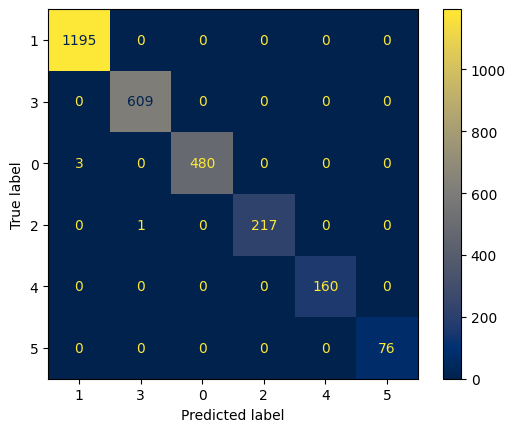

In [18]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

naive bayes classifier
ROC_AUC_Score: 0.998980962411688
accuracy:  0.9981758482305728
precision:  0.9980674862143978
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       1.00      1.00      1.00      1195
           2       0.99      1.00      1.00       218
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       160
           5       1.00      1.00      1.00        76

    accuracy                           1.00      2741
   macro avg       1.00      1.00      1.00      2741
weighted avg       1.00      1.00      1.00      2741



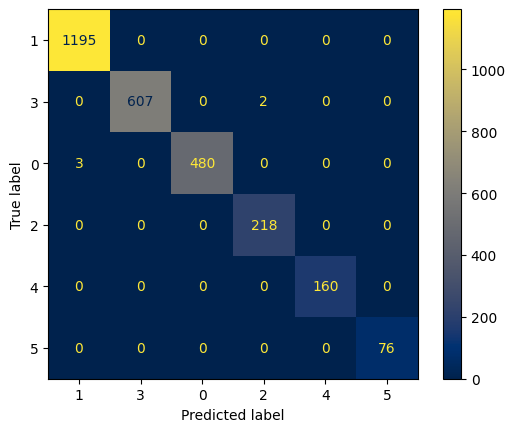

In [19]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv=nv.fit(X_train, y_train)
y_pred = nv.predict(X_test)
clf = 'naive bayes classifier'
model_eval(clf, y_test, y_pred)

neural network classifier
ROC_AUC_Score: 0.9987294782914286
accuracy:  0.9981758482305728
precision:  0.9985444390481998
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       1.00      1.00      1.00      1195
           2       1.00      1.00      1.00       218
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       160
           5       1.00      1.00      1.00        76

    accuracy                           1.00      2741
   macro avg       1.00      1.00      1.00      2741
weighted avg       1.00      1.00      1.00      2741



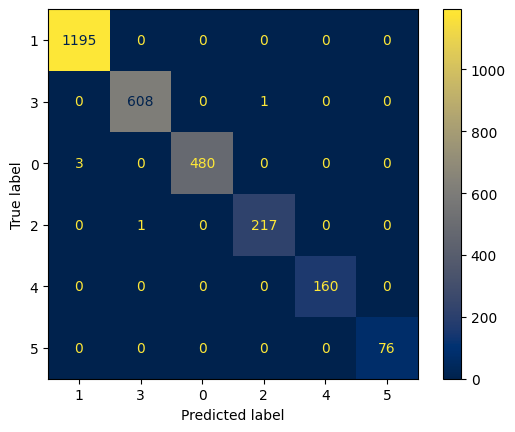

In [20]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000)
mlp=mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
clf = 'neural network classifier'
model_eval(clf, y_test, y_pred)

## Hồi quy

### Chạy trên 1 mô hình

In [21]:
from pdpbox import pdp
import matplotlib.pyplot as plt
y = df_model['Monthly Premium Auto']
X = df_model.drop(columns=['Monthly Premium Auto','Cluster'])
sc = StandardScaler()
X= sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_r = XGBRegressor()
xgb_r.fit(X_train,y_train)
y_pred = xgb_r.predict(X_test)
print(f'R Squared Score of XGBRegressor: {r2_score(y_pred, y_test)}')

R Squared Score of XGBRegressor: 0.9621639160680483


### Chạy trên 6 mô hình

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def xgb(a):
    print(a)
    y = df_model[df_model['Cluster']==a]['Monthly Premium Auto']
    X = df_model[df_model['Cluster']==a].drop(columns=['Monthly Premium Auto','Cluster'])
    # print(len(X.columns))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
    xgb_r = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
    xgb_r.fit(X_train,y_train)
    y_pred = xgb_r.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False) # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred) # Coefficient of Determination
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    # print("Root Mean Squared Error:", rmse)
    print('R Squared Score:',r2)

In [23]:
xgb(0)
xgb(1)
xgb(2)
xgb(3)
xgb(4)
xgb(5)

0
Mean Absolute Error: 4.7465874902133285
Mean Squared Error: 31.270351280818556
R Squared Score: 0.9547140210618511
1
Mean Absolute Error: 3.4489571021882113
Mean Squared Error: 16.188214047728085
R Squared Score: 0.4990399792857726
2
Mean Absolute Error: 6.008815107674434
Mean Squared Error: 65.72198283879472
R Squared Score: 0.9392987869930517
3
Mean Absolute Error: 5.764957685728331
Mean Squared Error: 46.209037513465844
R Squared Score: 0.23672672691939545
4
Mean Absolute Error: 4.887103201329023
Mean Squared Error: 31.5665125858879
R Squared Score: 0.010826548746861953
5
Mean Absolute Error: 15.287636421822214
Mean Squared Error: 390.7687038286539
R Squared Score: 0.8116726282489014


In [24]:
y = df_model[df_model['Cluster']==0]['Monthly Premium Auto']
X = df_model[df_model['Cluster']==0].drop(columns=['Monthly Premium Auto','Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_0 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
xgb_0.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
y = df_model[df_model['Cluster']==1]['Monthly Premium Auto']
X = df_model[df_model['Cluster']==1].drop(columns=['Monthly Premium Auto','Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_1 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
xgb_1.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
y = df_model[df_model['Cluster']==2]['Monthly Premium Auto']
X = df_model[df_model['Cluster']==2].drop(columns=['Monthly Premium Auto','Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_2 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
xgb_2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
y = df_model[df_model['Cluster']==3]['Monthly Premium Auto']
X = df_model[df_model['Cluster']==3].drop(columns=['Monthly Premium Auto','Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_3 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
xgb_3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
y = df_model[df_model['Cluster']==4]['Monthly Premium Auto']
X = df_model[df_model['Cluster']==4].drop(columns=['Monthly Premium Auto','Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_4 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
xgb_4.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
y = df_model[df_model['Cluster']==5]['Monthly Premium Auto']
X = df_model[df_model['Cluster']==5].drop(columns=['Monthly Premium Auto','Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
xgb_5 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
xgb_5.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Lưu mô hình

In [30]:
import pickle

In [31]:
pickle.dump(xgb_clf, open('classifier.pkl', 'wb'))
pickle.dump(xgb_0, open('xgb0.pkl', 'wb'))
pickle.dump(xgb_1, open('xgb1.pkl', 'wb'))
pickle.dump(xgb_2, open('xgb2.pkl', 'wb'))
pickle.dump(xgb_3, open('xgb3.pkl', 'wb'))
pickle.dump(xgb_4, open('xgb4.pkl', 'wb'))
pickle.dump(xgb_5, open('xgb5.pkl', 'wb'))

### Test dữ liệu mới

In [32]:
X = df_model.drop(columns=['Monthly Premium Auto','Cluster'])
z=X.describe()
export=z.to_excel (r'z.xlsx', index = None, header=True)
z

,Months Since Driving,Age,Months Since Last Claim,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage_Basic,...,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.00000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,177.558791,45.717320,15.097000,0.505912,0.017845,0.020145,0.196628,0.052989,0.206481,0.609591,...,0.04434,0.623823,0.047296,0.030874,0.253668,0.186446,0.344865,0.096562,0.284760,0.087366
std,149.118392,15.674646,10.073257,0.499992,0.132397,0.140502,0.397470,0.224023,0.404802,0.487869,...,0.20586,0.484452,0.212282,0.172985,0.435133,0.389488,0.475350,0.295377,0.451325,0.282386
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,33.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,141.000000,47.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,272.000000,59.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,707.000000,75.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
def TEST(test,z):
    listtest=[]
    for k in X.columns:
        l=k.split('_')
        if len(l)==1:
            x=(test[l[0]]-z[k][1])/z[k][2]
        else:
            if test[l[0]]==l[1]:
                x=(1-z[k][1])/z[k][2]
            else:
                x=(0-z[k][1])/z[k][2]           
        listtest.append(x)
    import numpy as np
    user_input=np.array([listtest])
    return user_input

In [34]:
def ketqua(test):
    dl=TEST(test,z)
    gr=xgb_clf.predict(dl)[0]
    if gr==0:
        gr='Basic B1'
        y_pred = xgb_0.predict(TEST(test,z))[0]
    elif gr==1:
        gr='Basic B2'
        y_pred = xgb_1.predict(TEST(test,z))[0]
    elif gr==2:
        gr='Extended E1'   
        y_pred = xgb_2.predict(TEST(test,z))[0]
    elif gr==3:  
        gr='Extended E2'
        y_pred = xgb_3.predict(TEST(test,z))[0]
    elif gr==4:
        gr='Premium P1'
        y_pred = xgb_4.predict(TEST(test,z))[0]
    elif gr==5:   
        gr='Premium P2'
        y_pred = xgb_5.predict(TEST(test,z))[0]
    y_p=round(y_pred)
    print(f'Gói bảo hiểm phù hợp: {gr}')
    print(f'Số tiền cần phải trả cho công ty là: {y_p}$')

In [35]:
test={'Months Since Driving':100,'Vehicle Class':'Two-Door Car','Age':24,'Coverage':'Extended','Marital Status':'Married',
      'Location Code':'Suburban','EmploymentStatus':'Employed','Months Since Last Claim':48,'State':'Washington'}
ketqua(test)

Gói bảo hiểm phù hợp: Extended E1
Số tiền cần phải trả cho công ty là: 143$


In [36]:
class_model = pickle.load(open('classifier.pkl', 'rb'))
dl=TEST(test,z)
class_model.predict(dl)[0]
reg_model = pickle.load(open('xgb2.pkl', 'rb'))
reg_model.predict(dl)[0]

143.10268

In [37]:
clus

,Cluster,Count,State,Vehicle Class,Coverage,Marital Status,Location Code,EmploymentStatus,Months Since Driving,Age,Months Since Last Claim,Monthly Premium Auto
0,B1,1542,"[California, Arizona, Oregon, Washington, Nevada]","[SUV, Sports Car, Luxury Car, Luxury SUV]",[Basic],"[Married, Divorced, Single]","[Suburban, Rural, Urban]","[Unemployed, Employed, Medical Leave, Disabled...",0.0 - 225.0,16.0 - 73.0,0.0 - 35.0,100.0 - 199.0
1,B2,4026,"[Washington, Oregon, California, Nevada, Arizona]","[Two-Door Car, Four-Door Car, Sports Car, SUV]",[Basic],"[Married, Single, Divorced]","[Suburban, Rural, Urban]","[Employed, Medical Leave, Unemployed, Disabled...",0.0 - 706.0,36.0 - 75.0,0.0 - 35.0,61.0 - 119.0
2,E1,769,"[Washington, Nevada, Oregon, California, Arizona]","[SUV, Luxury SUV, Sports Car, Luxury Car]",[Extended],"[Married, Divorced, Single]","[Urban, Suburban, Rural]","[Disabled, Employed, Unemployed, Medical Leave...",0.0 - 215.0,16.0 - 66.0,0.0 - 35.0,121.0 - 249.0
3,E2,1973,"[Arizona, Oregon, Washington, California, Nevada]","[Four-Door Car, Two-Door Car, SUV, Sports Car]",[Extended],"[Single, Married, Divorced]","[Suburban, Urban, Rural]","[Unemployed, Employed, Disabled, Retired, Medi...",0.0 - 688.0,37.0 - 75.0,0.0 - 35.0,76.0 - 139.0
4,P1,579,"[Nevada, Arizona, California, Oregon, Washington]","[Two-Door Car, Four-Door Car]",[Premium],"[Married, Single, Divorced]","[Suburban, Urban, Rural]","[Employed, Unemployed, Disabled, Medical Leave...",0.0 - 707.0,30.0 - 75.0,0.0 - 35.0,101.0 - 119.0
5,P2,245,"[Oregon, Arizona, Washington, California, Nevada]","[SUV, Luxury SUV, Sports Car, Luxury Car]",[Premium],"[Married, Single, Divorced]","[Rural, Urban, Suburban]","[Disabled, Employed, Unemployed, Retired, Medi...",0.0 - 533.0,16.0 - 74.0,0.0 - 35.0,140.0 - 298.0
